In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

In [2]:
df1 = pd.read_csv('data/test_transaction.csv')
df2 = pd.read_csv('data/test_identity.csv')

In [3]:
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
def mergeTransactionAndIdentity(df1, df2):
    df1.index = df1['TransactionID']
    df2.index = df2['TransactionID']
    df1.drop('TransactionID', axis=1, inplace=True)
    df2.drop('TransactionID', axis=1, inplace=True)
    df = df1.join(df2)
    return df

def cleanEmails(df):
    dfEmails = df[['P_emaildomain', 'R_emaildomain']]
    df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
    df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
    df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
    df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)      
    
Params = collections.namedtuple('Params', 
                                """lowPercentColumns midPercentColumns midAndLowPercentColumns 
                                highPercentColumns categoricalColumns categoricalOptions""")

def cleanTrainingData(df):
    categoricalColumns = df.columns[df.dtypes==object]
    numericColumns = df.columns[df.dtypes!=object]   
    
    percentNa = df[numericColumns].isna().sum()/ len(df)
    ####
    lowPercentColumns = numericColumns[(percentNa < .3) & (percentNa > 0)]
    ###
    midPercentColumns = numericColumns[(percentNa >= .3) & (percentNa < .7)]
    ###
    midAndLowPercentColumns = numericColumns[percentNa < .7]   
    highPercentColumns = numericColumns[percentNa >= .7]   
    #for column in lowPercentColumns:
    #    df[column] = df[column].fillna(df[column].mean())
    #for column in midPercentColumns:
    #    df["%s_isnan"%column] = df[column].isna()
    #    df[column] = df[column].fillna(df[column].mean())
    ###
    categoricalColumns= categoricalColumns
    #categoricalColumnsExceptEmail.remove('P_emaildomain')
    #categoricalColumnsExceptEmail.remove('R_emaildomain')
    ###
    categoricalOptions = {column: categoricalWithTooManyOptions(df, column) for column in categoricalColumns}
    #for column in categoricalColumnsExceptEmail:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=categoricalOptions[column])
    #dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
    #print(dfCategoricalExceptEmailDummied.columns)

    #emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
    ###
    #emailOptions = {column: categoricalWithTooManyOptions(df, column) for column in emailColumns}
    #for column in emailColumns:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=emailOptions[column])
    #dfEmailDummied = pd.get_dummies(df[emailColumns])
    params = Params(lowPercentColumns, 
           midPercentColumns,
           midAndLowPercentColumns,
           highPercentColumns,
           categoricalColumns,
           categoricalOptions
    )
    return params

In [4]:
df = mergeTransactionAndIdentity(df1, df2)

In [5]:
cleanEmails(df)

In [6]:
#del df1
#del df2

In [7]:
#params = cleanTrainingData(df)

In [8]:
with open('./params', 'rb') as f:
    params = pickle.load(f)
    #pickle.dump(params, f)

In [9]:
#tmp = df.drop(params['highPercentColumns'])
#tmp.columns[tmp.isna().sum() > 0]
df.drop(params.highPercentColumns, inplace=True, axis=1)

In [10]:
len(df.columns)

244

(array([181.,  21.,   0.,  16.,   7.,   1.,   1.,  12.,   3.,   2.]),
 array([0.        , 0.09900097, 0.19800194, 0.29700291, 0.39600388,
        0.49500485, 0.59400581, 0.69300678, 0.79200775, 0.89100872,
        0.99000969]),
 <a list of 10 Patch objects>)

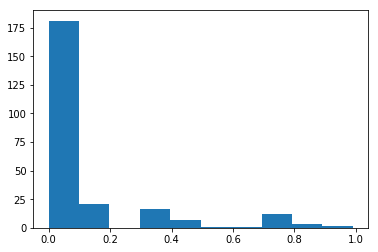

In [11]:
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [12]:
cleanNumericColumn(df, params.lowPercentColumns, createFlag=False)
cleanNumericColumn(df, params.midPercentColumns, createFlag=True)

(array([234.,   0.,   0.,   4.,   4.,   0.,   1.,  12.,   3.,   2.]),
 array([0.        , 0.09900097, 0.19800194, 0.29700291, 0.39600388,
        0.49500485, 0.59400581, 0.69300678, 0.79200775, 0.89100872,
        0.99000969]),
 <a list of 10 Patch objects>)

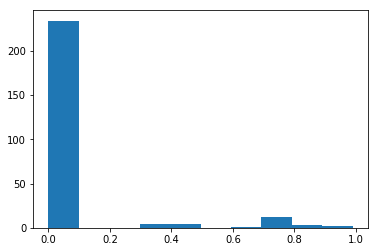

In [13]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [14]:
for column, highlyOccuring in params.categoricalOptions.items():
    for item in highlyOccuring:
        if pd.isna(item):
            highlyOccuring.remove(item)
            highlyOccuring.add('nan')
    df[column] = pd.Categorical(df[column], categories=list(highlyOccuring))
    #cleanOptions(df, column, highlyOccuring)

(array([234.,   0.,   0.,   4.,   4.,   0.,   1.,  10.,   2.,   5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

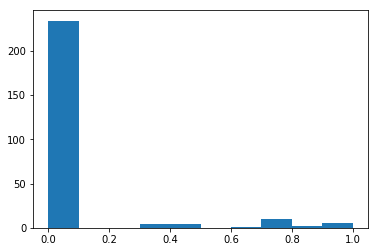

In [15]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [16]:
#tmp = df[params.]
#a = set(params.midAndLowPercentColumns)
#a.remove('isFraud')
#tmp = df.[list(a)]
#cleanNumericColumn(df, tmp.columns[tmp.isna().sum() > 0], createFlag=False) 

In [17]:
##tmp = df[params.]
##a.remove('isFraud')
#tmp = df[params.categoricalColumns]
#for column in tmp.columns[tmp.isna().sum() > 0]:

In [18]:
#df_new = pd.get_dummies(df, columns=params.categoricalColumns)
#for key, value in params.categoricalOptions.items():
df_new = pd.get_dummies(df, columns=params.categoricalColumns, dummy_na=False)

(array([339.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.00093706, 0.00187412, 0.00281118, 0.00374824,
        0.0046853 , 0.00562236, 0.00655942, 0.00749648, 0.00843354,
        0.0093706 ]),
 <a list of 10 Patch objects>)

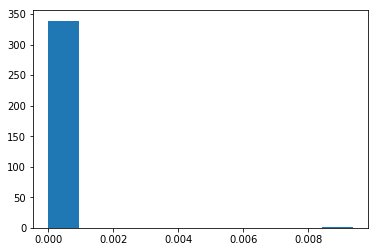

In [19]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

In [20]:
cleanNumericColumn(df_new, df_new.columns[df_new.isna().sum()>0], createFlag=False)

(array([  0.,   0.,   0.,   0.,   0., 340.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

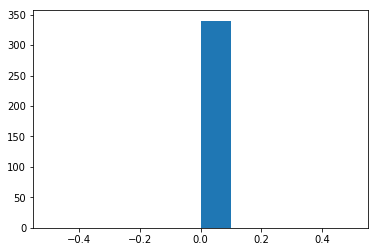

In [21]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

In [29]:
df_train = pd.read_pickle('data/dataframe_v04.pd')
pd.to_pickle(df_new, 'data/dataframe_test_v04.pd')

In [30]:
traincols = set(df_train.columns)

In [31]:
testcols = set(df_new.columns)

In [32]:
print(traincols - testcols)
print(testcols - traincols)

{'isFraud'}
set()


In [33]:
df_new.shape

(506691, 340)

In [43]:
indices = df_train.columns[1:] != df_new2.columns

In [44]:
df_train.columns[1:][indices]

Index([], dtype='object')

In [45]:
df_new2.columns[indices]

Index([], dtype='object')

In [46]:
set(df_train.columns[1:][indices])-set( df_new.columns[indices])

set()

In [41]:
df_new2 = df_new[df_train.columns[1:]]

In [42]:
df_new2.shape

(506691, 340)

In [76]:
df_train.shape

(590540, 374)

In [77]:
df_new.shape

(506691, 373)

In [83]:
len(df_train.columns)

374

In [94]:
set(df_new.columns)-set(df_train.columns)

set()

In [96]:
set(df_train.columns)-set(df_new.columns)

{'isFraud'}

In [104]:
df_new[df_train.columns[2:]].shape

(506691, 424)

In [24]:
for column in df_new.columns[1:]:
    if len(df_new[column].shape)>1:
        print(column)

In [26]:
df_new['DeviceType_nan']

TransactionID
3663549    0
3663550    0
3663551    0
3663552    0
3663553    0
          ..
4170235    0
4170236    0
4170237    0
4170238    0
4170239    0
Name: DeviceType_nan, Length: 506691, dtype: uint8

In [27]:
df_new['DeviceType_nan']

TransactionID
3663549    0
3663550    0
3663551    0
3663552    0
3663553    0
          ..
4170235    0
4170236    0
4170237    0
4170238    0
4170239    0
Name: DeviceType_nan, Length: 506691, dtype: uint8

In [117]:
df1.shape

(506691, 392)

In [118]:
df2.shape

(141907, 40)

In [49]:
df_new2.columns[df_new2.columns!=df_train.columns[1:]]

Index([], dtype='object')

In [129]:
df['DeviceType']

TransactionID
3663549       NaN
3663550       NaN
3663551       NaN
3663552       NaN
3663553       NaN
            ...  
4170235       NaN
4170236    mobile
4170237       NaN
4170238       NaN
4170239    mobile
Name: DeviceType, Length: 506691, dtype: category
Categories (3, object): [desktop, mobile, nan]

In [152]:
pd.get_dummies(df['DeviceInfo'], dummy_na=False).sample(10)

DeviceInfo,nan,Trident/7.0,iOS Device,Windows,MacOS
TransactionID,,,,,
3728372,0,0,0,0,0
4009092,0,0,0,0,0
4113330,0,0,0,0,0
3948895,0,0,0,0,0
3766285,0,0,0,0,0
4018040,0,0,0,0,0
4028524,0,0,0,0,1
4021889,0,0,0,0,0
4162621,0,0,0,0,0
